In [1]:
import ibmos2spark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import col, udf
from pyspark.sql.types import *

credentials = {
    'endpoint': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-6f7afe46-9d64-4655-a4b5-7723ebc8d6b9',
    'iam_service_endpoint': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'api_key': 'IRFVMdQySWoqy9K1csk9n3YvkEEUB91AoDf1lejTO2Z2',
    "url": "https://eu-gb.ml.cloud.ibm.com"
}


conf = SparkConf().setAppName("pyspark")
sc = SparkContext(conf=conf)
configuration_name = 'os_272147f35e24400bb8e2c760bd4dfd41_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

spark = SparkSession.builder.appName("intro").master("local[*]").config("spark.driver.bindAddress", "127.0.0.1").getOrCreate()

In [2]:
df_data = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema','True')\
  .load(r'F:\coucou\AIMS\Data_Science\IBM_Digital_Nations\patientdataV6.csv')
d=df_data.toPandas()

In [3]:
df_data.printSchema()


root
 |-- AVGHEARTBEATSPERMIN: integer (nullable = true)
 |-- PALPITATIONSPERDAY: integer (nullable = true)
 |-- CHOLESTEROL: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- HEARTFAILURE: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SEX: string (nullable = true)
 |-- FAMILYHISTORY: string (nullable = true)
 |-- SMOKERLAST5YRS: string (nullable = true)
 |-- EXERCISEMINPERWEEK: integer (nullable = true)



In [32]:
%pylab inline
# from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
from pandas import Series
#import os
#import turtle
#import colorsys
import sklearn
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
import pixiedust
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from datetime import date
sns.set_style("white")
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth":1.25, "lines.markersize":8})
get_ipython().magic('matplotlib inline')

Populating the interactive namespace from numpy and matplotlib


c:\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
#d1=pd.read_csv(r'F:\coucou\AIMS\Data_Science\IBM_Digital_Nations\patientdataV6.csv')
cols=d.columns
cols


Index(['AVGHEARTBEATSPERMIN', 'PALPITATIONSPERDAY', 'CHOLESTEROL', 'BMI',
       'HEARTFAILURE', 'AGE', 'SEX', 'FAMILYHISTORY', 'SMOKERLAST5YRS',
       'EXERCISEMINPERWEEK'],
      dtype='object')

In [6]:
#Data for only integer types
d2=d.select_dtypes(include=['int'])

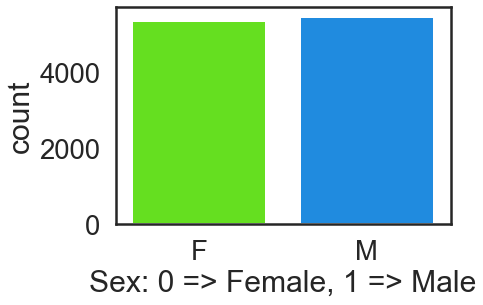

In [7]:
# Visualizing the distribution of Male and Female genders in the data
sns.countplot(x='SEX', data=d, palette='gist_rainbow')
plt.xlabel("Sex: 0 => Female, 1 => Male")
plt.show()

In [8]:
# We can utilize the crosstab method in the pandas library to analyze how gender impacts a person's chance of getting a heart disease
gender_impact = pd.crosstab(d['SEX'], d['HEARTFAILURE'])
gender_impact


HEARTFAILURE,N,Y
SEX,,
F,4446,900
M,4566,888


In [9]:
BMI_impact = pd.crosstab(d['HEARTFAILURE'], d['BMI'])
BMI_impact

BMI,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
HEARTFAILURE,,,,,,,,,,,,,,,
N,636,660,747,647,668,681,704,699,704,686,711,704,702,30,33
Y,32,32,153,145,118,135,128,150,123,152,123,136,153,104,104


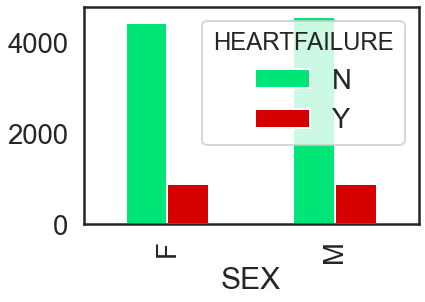

In [10]:
gender_impact.plot(kind='bar', stacked=False, color=['#00e676', '#d50000'])

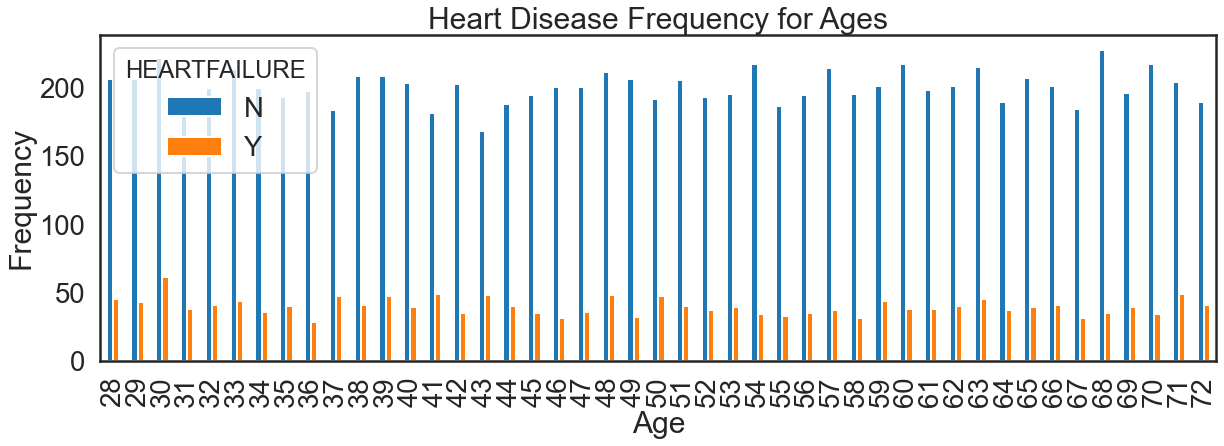

In [11]:
#Frequency of people per age with heart failure or not
pd.crosstab(d.AGE, d.HEARTFAILURE).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

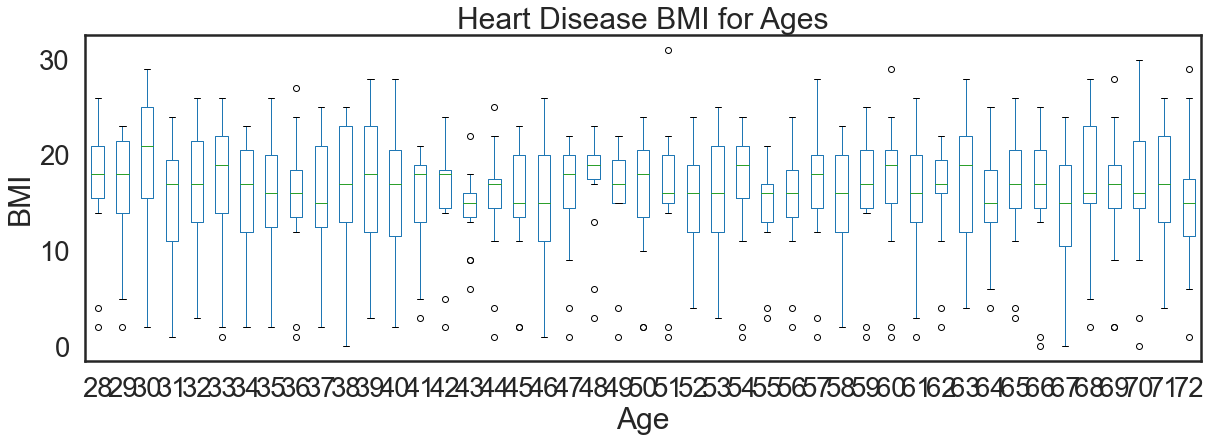

In [12]:
#A view of the Body Mass Index related to age
pd.crosstab( d.BMI,d.AGE).plot(kind="box",figsize=(20,6))
plt.title('Heart Disease BMI for Ages')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.savefig('heartDisease.png')
plt.show()

In [13]:
#Description of Dataset
d.describe()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


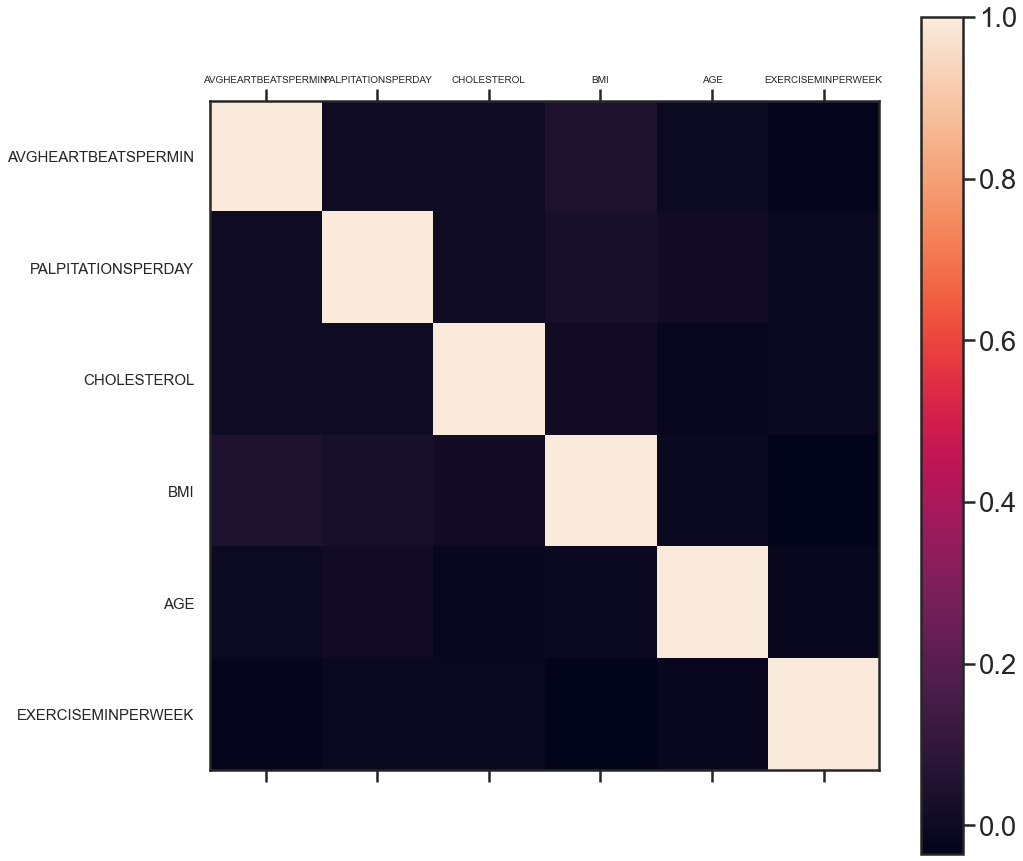

In [14]:
#The plot of the correlation of differents integers features
rcParams['figure.figsize'] = 1,15
plt.matshow(d2.corr())
plt.yticks(np.arange(d2.shape[1]), d2.columns,  fontsize=15)
plt.xticks(np.arange(d2.shape[1]), d2.columns, fontsize=10)
plt.colorbar()

In [15]:
df= spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema','True')\
  .load(r"F:\coucou\AIMS\Data_Science\Dataset\Dat3_zin_depress\train.csv")
#df.printSchema()

In [16]:
display(df_data)

DataFrame[AVGHEARTBEATSPERMIN: int, PALPITATIONSPERDAY: int, CHOLESTEROL: int, BMI: int, HEARTFAILURE: string, AGE: int, SEX: string, FAMILYHISTORY: string, SMOKERLAST5YRS: string, EXERCISEMINPERWEEK: int]

# Prepare data

In [17]:
#Split data in train and test resp (80% and 20%)
split_data = df_data.randomSplit([0.8, 0.20], 24)
train_data = split_data[0]
test_data = split_data[1]

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 8637
Number of testing records : 2163


#  Create pipeline and train a model

In [18]:
from pyspark.ml.feature import StringIndexer, IndexToString, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline, Model

In the following step, convert all the string fields to numeric ones by using the StringIndexer transformer.

In [19]:
stringIndexer_label = StringIndexer(inputCol="HEARTFAILURE", outputCol="label").fit(df_data)
stringIndexer_sex = StringIndexer(inputCol="SEX", outputCol="SEX_IX")
stringIndexer_famhist = StringIndexer(inputCol="FAMILYHISTORY", outputCol="FAMILYHISTORY_IX")
stringIndexer_smoker = StringIndexer(inputCol="SMOKERLAST5YRS", outputCol="SMOKERLAST5YRS_IX")

create a feature vector by combining all features together.

In [20]:
vectorAssembler_features = VectorAssembler(inputCols=["AVGHEARTBEATSPERMIN","PALPITATIONSPERDAY","CHOLESTEROL"\
,"BMI","AGE","SEX_IX","FAMILYHISTORY_IX","SMOKERLAST5YRS_IX","EXERCISEMINPERWEEK"], outputCol="features")

define estimators you want to use for classification. Random Forest is used in the following example.

In [21]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

Finally, indexed labels back to original labels.

In [22]:
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=stringIndexer_label.labels)

In [23]:
transform_df_pipeline = Pipeline(stages=[stringIndexer_label, stringIndexer_sex, stringIndexer_famhist, stringIndexer_smoker, vectorAssembler_features])
transformed_df = transform_df_pipeline.fit(df_data).transform(df_data)
transformed_df

DataFrame[AVGHEARTBEATSPERMIN: int, PALPITATIONSPERDAY: int, CHOLESTEROL: int, BMI: int, HEARTFAILURE: string, AGE: int, SEX: string, FAMILYHISTORY: string, SMOKERLAST5YRS: string, EXERCISEMINPERWEEK: int, label: double, SEX_IX: double, FAMILYHISTORY_IX: double, SMOKERLAST5YRS_IX: double, features: vector]

Let's build the pipeline now. A pipeline consists of transformers and an estimator.

In [24]:
pipeline_rf = Pipeline(stages=[stringIndexer_label, stringIndexer_sex, stringIndexer_famhist, stringIndexer_smoker\
                               , vectorAssembler_features, rf, labelConverter])

Now, I can train the Random Forest model by using the previously defined pipeline and training data.

In [25]:
model_rf = pipeline_rf.fit(train_data)

I can check the model accuracy now. To evaluate the model, I use test data.

In [26]:
predictions = model_rf.transform(test_data)
evaluatorRF = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorRF.evaluate(predictions)
print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.859917
Test Error = 0.140083


In [27]:
df1=d[cols]

In [28]:
df1 = df1.replace(to_replace ="Y", value =1)
df1 = df1.replace(to_replace = "N", value = 0)
df1 = df1.replace(to_replace ="M", value =1)
df1 = df1.replace(to_replace ="F", value =0)

In [29]:

# Initializing the MinMaxScaler ( ) function
min_max_scaler = preprocessing.MinMaxScaler ()
# Transformaing the data into normalized data
np_scaled = min_max_scaler.fit_transform( df1 )
# Storing the normalized data into a dataframe
d_normalized = pd.DataFrame( np_scaled )
# Assigning names to the columns of the normalized dataset
d_normalized.columns = cols
cols1=d_normalized.drop(['HEARTFAILURE'] , axis=1)


In [30]:
X = d_normalized.drop(['HEARTFAILURE'] , axis=1)
y = d_normalized[["HEARTFAILURE"]]
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size=0.2)

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

c:\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

['linear', 'poly', 'rbf', 'sigmoid'] [0.8407407407407408, 0.8699074074074075, 0.8648148148148148, 0.7458333333333333]


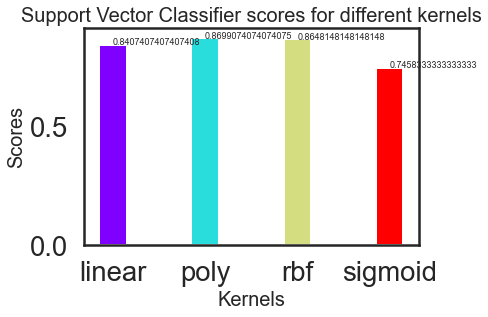

In [33]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors, width=0.3)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i] ,fontsize=9)
plt.xlabel('Kernels',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Support Vector Classifier scores for different kernels',fontsize=20)
print(kernels,svc_scores)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

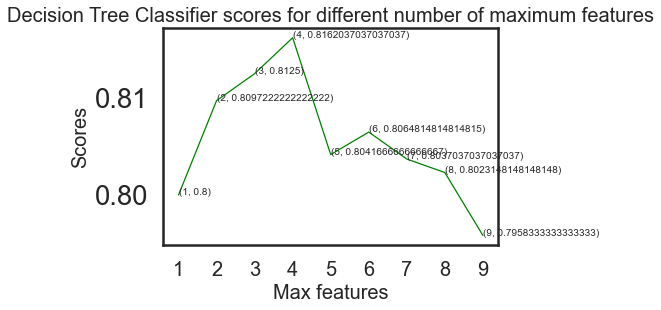

In [34]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
    
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]),fontsize=10)
plt.xticks([i for i in range(1, len(X.columns) + 1)],fontsize=20)
plt.xlabel('Max features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.title('Decision Tree Classifier scores for different number of maximum features',fontsize=20)    

In [35]:
# Defining the model
clf = svm.SVC(kernel='rbf', gamma=0.7 , C=1)
# 6 folds crossvalidation
kfold = KFold( n_splits=6)
c,r = y.values.shape
y = y.values.reshape(c,)
scores = cross_val_score(clf, X, y, cv = kfold)
print( "Cross-validation scores:{}".format(scores))
print( "\n\n Cross-validation mean score:{}".format(scores.mean()))

Cross-validation scores:[0.74166667 0.90444444 0.9        0.89777778 0.88277778 0.81555556]


 Cross-validation mean score:0.8570370370370372


In [36]:
# Defining the model
clf1 = svm.SVC(kernel='poly', degree=3, C=1).fit(X,y)
# 6 folds crossvalidation
kfold = KFold( n_splits=6)
scores = cross_val_score(clf1, X, y, cv = kfold)
print( "Cross-validation scores:{}".format(scores))
print( "\n\n Cross-validation mean score:{}".format(scores.mean()))

Cross-validation scores:[0.74555556 0.90555556 0.895      0.89944444 0.885      0.81444444]


 Cross-validation mean score:0.8575


In [ ]:
# Defining the range in which we are looking for the parameters
par = [i for i in np.linspace(0.001, 50, 10)]
param_grid={"gamma":par, "C":par}
# Applying the GridSearchCV()
grid_search= GridSearchCV(SVC(), param_grid, cv=5)
# Data splitting and GridSearchCV training
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)
grid_search.fit(X_train, y_train)
print("Test set_score:{:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

# Deploy the model and evaluate performance

In [41]:
wml_credentials = {
  "apikey": "ym2_8c-ro2PBQOwIQ13Z16azITP49ASnfLbhCTYyAYFB",
  "iam_apikey_description": "Auto-generated for key 2978e264-69e4-4fa1-aa9e-b945ad83294c",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/1a49cba1afbc4e73be93ec440b2e28f4::serviceid:ServiceId-a10ff7b5-7698-457c-bcdc-e1c0bb85d199",
  "instance_id": "7170f2e9-2b9c-469b-806f-57018f683c44",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

print(wml_credentials)

{'apikey': 'ym2_8c-ro2PBQOwIQ13Z16azITP49ASnfLbhCTYyAYFB', 'iam_apikey_description': 'Auto-generated for key 2978e264-69e4-4fa1-aa9e-b945ad83294c', 'iam_apikey_name': 'wdp-writer', 'iam_role_crn': 'crn:v1:bluemix:public:iam::::serviceRole:Writer', 'iam_serviceid_crn': 'crn:v1:bluemix:public:iam-identity::a/1a49cba1afbc4e73be93ec440b2e28f4::serviceid:ServiceId-a10ff7b5-7698-457c-bcdc-e1c0bb85d199', 'instance_id': '7170f2e9-2b9c-469b-806f-57018f683c44', 'url': 'https://eu-gb.ml.cloud.ibm.com'}


In [ ]:
import tensorflow
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.version)

In [ ]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "IBM_PY", 
               client.repository.ModelMetaNames.NAME: "Heart Attack Prediction Model"}
published_model = client.repository.store_model(model=model_rf, pipeline=pipeline_rf, meta_props=model_props, training_data=train_data)